$$\mbox{CASO APLICATIVO DE REGRESIÓN LOGÍSTICA}$$

Integrantes:
    
    -Hernan Carmelo Cavadias Martinez
    -Duvan Santiago Castro Bolivar 
    -David Santiago Buitrago Norato
    -Miguel Angel Malagón Romero

In [63]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
datos = pd.read_excel('datos.xlsx')

In [42]:
datos.head()

,ID,Churn,Customer Age,CHI Score 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
0,1,0,67,0,0,0,0,0.0,0.0,0,0,0,31
1,2,0,67,62,4,0,0,0.0,0.0,0,0,-16,31
2,3,0,55,0,0,0,0,0.0,0.0,0,0,0,31
3,4,0,63,231,1,1,-1,3.0,0.0,167,-8,21996,0
4,5,0,57,43,-1,0,0,0.0,0.0,0,0,9,31


In [43]:
datos['Customer Age'] = datos['Customer Age'].apply(lambda x: 1 if x < 14  else 0)

In [44]:
x = datos[datos.columns[2:]].values
y = datos['Churn'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir resultados
print("Exactitud (Accuracy): {:.2f}%".format(accuracy * 100))
print("Matriz de Confusión:")
print(conf_matrix)
print("Informe de Clasificación:")
print(class_report)

Exactitud (Accuracy): 94.88%
Matriz de Confusión:
[[1205    0]
 [  65    0]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1205
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1270
   macro avg       0.47      0.50      0.49      1270
weighted avg       0.90      0.95      0.92      1270



In [49]:
model = sm.Logit(y, x)
result = model.fit()

# Imprimir los coeficientes (betas) del modelo
print("Coeficientes del modelo:")
print(result.params)

# Realizar un test de significancia
print("\nTest de significancia:")
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.224896
         Iterations 9
Coeficientes del modelo:
[-2.12167970e+00 -2.32113586e-02  4.47003574e-03  2.28124283e-02
  3.49431213e-02 -2.94898452e-02 -5.98338606e-02  1.97381108e-03
 -2.73070523e-02 -1.51797812e-04 -2.33968523e-03]

Test de significancia:
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6347
Model:                          Logit   Df Residuals:                     6336
Method:                           MLE   Df Model:                           10
Date:                Thu, 21 Sep 2023   Pseudo R-squ.:                 -0.1182
Time:                        12:49:17   Log-Likelihood:                -1427.4
converged:                       True   LL-Null:                       -1276.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err     

In [75]:
x = datos[['Customer Age','CHI Score 0','CHI Score 0-1','Views 0-1']].values
y = datos['Churn'].values

**PASOS A SEGUIR**

Como notamos en muestra matriz de confusión, tenemos desbalanceada la muestra por lo que vamos a utilizar la técnica de SMOTE vALUE para balancear los 1 frente a los 0.

In [76]:
print('La cantidad de 1 que tenemos en nuestra variable dependiente es:',datos['Churn'].sum())

La cantidad de 1 que tenemos en nuestra variable dependiente es: 323


$$\mbox{BALANCEO DE LA MUESTRA - SMOTE VALUE}$$

In [77]:
smt = SMOTE()
x, y = smt.fit_resample(x, y)

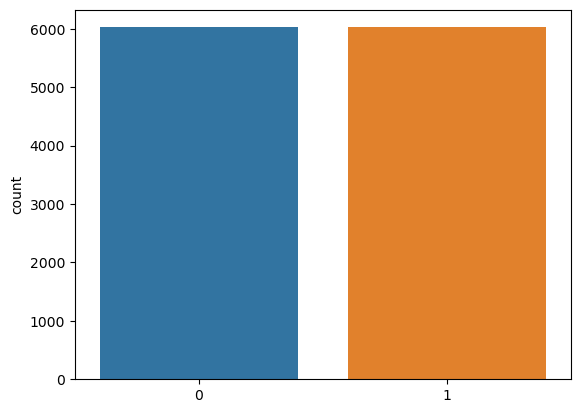

In [78]:
ax = sns.countplot(x=y)

$$\mbox{Modelo de regresión Logística}$$

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir resultados
print("Exactitud (Accuracy): {:.2f}%".format(accuracy * 100))
print("Matriz de Confusión:")
print(conf_matrix)
print("Informe de Clasificación:")
print(class_report)

Exactitud (Accuracy): 67.80%
Matriz de Confusión:
[[867 336]
 [440 767]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1203
           1       0.70      0.64      0.66      1207

    accuracy                           0.68      2410
   macro avg       0.68      0.68      0.68      2410
weighted avg       0.68      0.68      0.68      2410



In [80]:
model = sm.Logit(y, x)
result = model.fit()
# Realizar un test de significancia
print("\nTest de significancia:")
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.662622
         Iterations 6

Test de significancia:
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                12048
Model:                          Logit   Df Residuals:                    12044
Method:                           MLE   Df Model:                            3
Date:                Thu, 21 Sep 2023   Pseudo R-squ.:                 0.04404
Time:                        13:53:04   Log-Likelihood:                -7983.3
converged:                       True   LL-Null:                       -8351.0
Covariance Type:            nonrobust   LLR p-value:                4.141e-159
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4539      0.031    -14.503      0.000      -0.515      -0.393
x2   

En comparación con el modelo inicial, notamos que las variables son significativas y estadisticos como el Pseudo R2 es coherente, por otro lado la matriz de confusión, tiene una capacidad de predicción de no abandonar es decir, que la variable independinte tome el valor de Cero, cerca de el 66% de las veces. 

$$\mbox{Probabilidad de mantenerse}$$

In [84]:
proba = result.predict(x)

# Crear un nuevo DataFrame con las probabilidades
df_probabilidades = pd.DataFrame({'Probabilidad': proba})

datos_final = datos[['ID','Churn','Customer Age','CHI Score 0','CHI Score 0-1','Views 0-1']]
datos_final['Probabilidad'] = df_probabilidades

In [87]:
filtro = datos_final['Probabilidad']>0.7
datos_final[filtro].head(10)

,ID,Churn,Customer Age,CHI Score 0,CHI Score 0-1,Views 0-1,Probabilidad
108,109,0,0,0,-125,-216,0.791720
298,299,1,0,14,-101,-16,0.740287
356,357,1,1,203,25,-28322,0.873959
585,586,0,1,175,-26,-12686,0.714069
883,884,0,0,194,-1,-13961,0.771192
928,929,0,1,123,35,-20607,0.756909
1573,1574,0,0,3,-87,9,0.712982
1970,1971,0,0,0,-113,69,0.765002
2286,2287,0,0,227,7,-27768,0.923919
2480,2481,0,0,21,-94,2,0.724000


Revisar las edades